<h1 align="center">Machine Learning and Statistics</h1>

## Notebook for ML Models: Notes and Practical Exercises

1. What is a Mathematical model
2. Develop a model based on data points
3. Run code to find the best parameters
4. Solve a modelling problem analytically. 

1. Mathematical Models
   https://en.wikipedia.org/wiki/Mathematical_model
   At its most basic a mathematical model is simply a way of representing the real world using maths and maths equations. Everyting from forecasting the weather, the stock market, the movement of the stars and somewhat more recently machine learning models, to name a few, rely on the use of maths to turn these into numerical models that allow for a complete description of how they behave and how they are likely to behave. 

   For example take a very simple equatation 

    - y = 3x+2

   What this equatation describes is the relationship between some independant variable x, and a dependant variable y. We say y is a dependant variable as its value clearly depends on the value of x, i.e. it will always be 3 times the value of x plus 2, and when x = 0 then will be equal to 2. In general the value of y will change at a rate 3 times that of x, for every unit change in x, the value of y will change by 3 times the unit change of x.

   In general terms the equation of a straight line is:
   
   - y = mx+c. 
   
   m is the slope, the greater m the more y changes with x. c is a constant and represents the value of y when x = 0, i.e. the point on the y axis where the line crosses at x = 0 in a plot of the equatation. 

   From a purely machine learning perspective having this equatation means that for every value of x we can predict what the value of y will be, even when x is 0. This equatation, simple and limited it may be, is still a perfect predictor for the dependant value y. 

   Coming from the opposite perspective, in the real world we often have lots of data, the challenge is trying to discover what is the relationship between sets of data that can be defined numerically coming from a system, i.e. what is the formula or formulas that govern the relationship between system variables that will allow for a model of the system to be created that can describe and predict its behaviours.  
    
   This leads on to the concept of Linear Regression, i.e. the data is available, what is the equation governing the relationship. In practice real world data is not straightforward, there can be a lot of "noise" in the data, i.e. data points that fall outside a pure linear equataton like the one above. The challenge for linear regression is to find the mathematical relationship that most closely matches the available data. 

   Below are some plot examples to demonstrate a linear equatation. 

In [1]:
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
# https://numpy.org/
# Will use numpy for generating maths functions and matplotlib for plotting same. 
import numpy as np
import matplotlib.pyplot as plt

# Set standard output plot size. 
plt.rcParams['figure.figsize'] = (8,6)

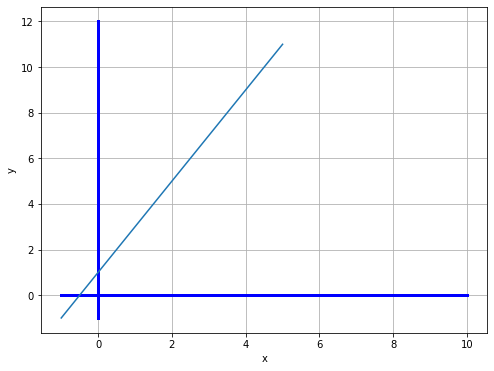

In [2]:
# This plot shows the equatation y = 2x+c in the x range -1 to 5. 
# Set the range of x values
x_val = [x for x in range(-1, 6)]

# Draw x and y axes and set the linewidth. 
plt.plot([-1, 10], [0, 0], 'b', lw=3)
plt.plot([0, 0], [-1, 12], 'b', lw=3)

# Set the values of m and b
m = 2
c = 1

# Calculate the corresponding y values
y = [m*x + c for x in x_val]

# Plot the points (x, y)
plt.plot(x_val, y)

# Add labels to the axes
plt.xlabel('x')
plt.ylabel('y')

plt.grid()
# Show the plot
plt.show()

Unlike the plot above the code and plot below is intended to demonstrate a more realistice picture of real world data where the concept of "noise" is introduced.

In [3]:
# Use the numpy arange function to get a series of values that will be used for x, in this case from 0 to 20 (always one leas than the upper number specified.)
x = np.arange(0,21,1)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [4]:
# Generate y values that include a level of randomness using the numpy random.normal (gaussian) function. 
# Generate the smae number of values as x.
# In this case it is a normal distribution with a mean of 0,standard deviation of 5 and will have 21 values, same as x. 
# This will be the "noise" or randomness in the data. 
y1 = np.random.normal(0,5,x.size)
y1

array([ 3.13001444, -7.97957958, -3.48076757,  3.44166875,  5.33100112,
       -3.37461193, -1.28125338, -2.6534148 ,  1.74266144,  1.62182338,
        4.17386414,  0.64005478, -1.44128518, -9.34869385,  2.79518495,
       -6.90861478,  3.34820604, -3.23427194,  1.5723835 ,  1.7934011 ,
        4.77303049])

In [5]:
# Generate simple linear values for y. 
y2 = 5*x+10
y2

array([ 10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,  70,
        75,  80,  85,  90,  95, 100, 105, 110])

In [6]:
# Add the noise to the linear values. 
y = y1+y2


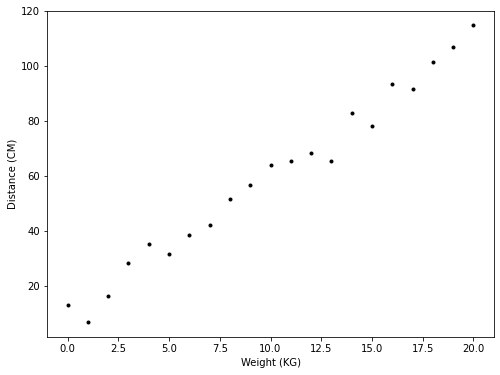

In [7]:
# Plot the noisy data, give them units of measure for effect.  
plt.xlabel('Weight (KG)')
plt.ylabel('Distance (CM)')
plt.plot(x,y,'k.');

So now we have a graph that could approximate some real world data. While we know the equations from which it was derived the more usual situation is that we will have this data but NOT know what the x / y relationship is. The challenge is to find some methodology that allows for the relationship to be defined from the available data. 

[Central Limit Theorem](https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_probability/BS704_Probability12.html#:~:text=The%20central%20limit%20theorem%20states,will%20be%20approximately%20normally%20distributed)

This leads on to the Central Limit Theorem that states that the means of a set of independant, sufficiently large samples, randomly selected from a population will themselves be normally distributed even if the original population is not normally distributed. The significance of this is that the normal probability model can be used to quantify uncertainty when making inferences about a population mean based on the sample data.

This means that we can use statistical methods, such as hypothesis testing, to be able to infer relationships between variables. 

### Fitting the Line
So now that we have a plot of data we can look at methods to estimate what the relationship might be, assuming we do not know it in the first place. 

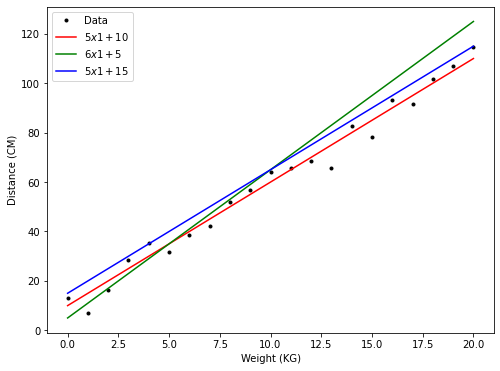

In [8]:
# Plot weight versus distance as above. 
plt.plot(x, y, 'k.', label="Data")

# Overlay some lines on the plot.
x1 = np.arange(0.0, 21.0, 1.0)

# From a view of the original plot it may be possible to make a guesstimate of what the relationship is between both variables. 
plt.plot(x1, 5.0 * x + 10.0, 'r-', label=r"$5x1 + 10$")
plt.plot(x1, 6.0 * x +  5.0, 'g-', label=r"$6x1 +  5$")
plt.plot(x1, 5.0 * x + 15.0, 'b-', label=r"$5x1 + 15$")

# Add a legend.
plt.legend()

# Add axis labels.
plt.xlabel('Weight (KG)')
plt.ylabel('Distance (CM)')

# Show the plot.
plt.show()

While the estimate lines look "reasonable" it is clear that guess alone is not going to be enough to find the real closest fit. Note that a line that actually joins all the data points is of no practical value in terms of being able to make predictions about unseen values as it is only valid for the data that is available. This is known as overfitting and is something that design of all ML models need to guard against. 

What is needed is a line where the sum of all the differences between each data point and the line is a minimum. 
The objective is to find the line from all possible lines that has the minimum sum of all the squares of the values of these points distances betweenit and the data. Values are squared to take care of the negative values.

https://www.simplilearn.com/tutorials/machine-learning-tutorial/cost-function-in-machine-learning
This is known as the Cost Function and expressed below. 

$$\sum_{i}(y_i - mx_i -c)^2$$

In [9]:
# As an example calculate the cost of each of the the lines above for the data.
# Use a lambda function to calculate. A lambda function is a small inline function that can have multiple arguments but consist of a single calculation on those arguments. Here the values of m and c are passed to the function and the cost caluclated using the formula above.
cost = lambda m,c: np.sum([(y[i] - m * x[i] - c)**2 for i in range(x.size)])

print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (5.0, 10.0, cost(5.0, 10.0)))
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (6.0,  5.0, cost(6.0,  5.0)))
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (5.0, 15.0, cost(5.0, 15.0)))

Cost with m =  5.00 and c = 10.00:   364.58
Cost with m =  6.00 and c =  5.00:  1598.20
Cost with m =  5.00 and c = 15.00:   942.97


### Optimisation
It is no surprise that the line with the same values of m and c that were used to create the dataset in the first place appear to have the lowest cost, but even that is no guarantee that this is actually the lowest cost possible. What is needed is a method to calculate the variables for the equation that will give this lowest cost. This is where Optimization comes in being the problem of finding a numerical solution to a minimisation problem.

We canmake use of Scipy, this is a set of mathematical functions built on top of Numpy that facilitate calculations in areas such as optimization and liner functions. Specifically the Scipy optimize function can be used the find the minimum the cost function of a set of data. 

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html

https://scipy-lectures.org/intro/scipy.html

What do you need. 
1. Function. The function to be minimised. 
2. Data.
3. Calculation Method

In [10]:
# Get the Optimize module from scipy. 
from scipy import optimize as so

In [11]:
# Generate the x independant variable, 20 integer values between 0 and 20. 
x = np.arange(0,21,1)

# generate some random noise.
randpart = np.random.normal(0,5,x.size)

# Generate the dependant variable y as 5x + 10 + noise.
y = 5*x+10+randpart

# Dataset is below and plotted 
x,y

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 array([ 12.37951395,  14.47500109,  25.91470123,  21.69624819,
         32.20309288,  35.75038987,  50.49070844,  38.10696491,
         56.77503079,  61.17528943,  67.50644842,  71.07141554,
         67.88690558,  74.04415482,  86.42392168,  80.34214992,
         87.96091384,  96.01226283,  86.99740259, 107.28940987,
        109.19003667]))

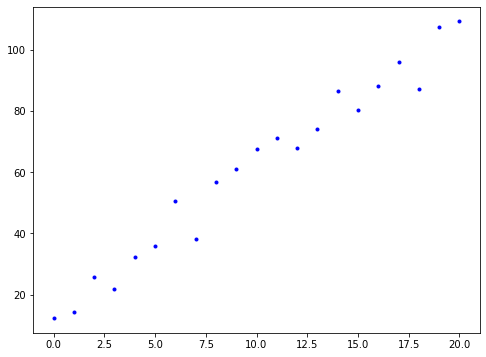

In [12]:
plt.plot(x,y, 'b.')
plt.show()

In [13]:
# Basic Cost function. Note the function has to take a single argument.
def cost (MC):
    m,c = MC
    cost = np.sum((y - m*x - c)**2)
    return cost

In [14]:
# Test it out.
cost((5,10))

640.5545441477644

In [15]:
# Here use the scipy.optimize.minimise function. It takes 2 arguments, the function to be minimised and an initial guess.
# Here guessing m=4, c=6, could be any 2 numbers.  
result=so.minimize(cost,(4,6))
result

      fun: 563.6688601411923
 hess_inv: array([[ 0.00064935, -0.00649351],
       [-0.00649351,  0.08874461]])
      jac: array([ 0.00000000e+00, -7.62939453e-06])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([ 4.74477747, 13.68041394])

The output from the optimisation is provided from the optimiser with a message that is was successful in finding a minimum. In this case x: array gives the values of m and c respectively and fun: is the cost value of the function at those 2 values. nfev gives the number of runs that were performed by the function to get to the minimum. Status of 0 indicates the run was successful, a 1 or 2 would indicate that the minimum was not found within the maximum number of evaluations. 

In [16]:
# Now plot this line against the original data. 
# Get the m and c values from the result above
m_opt, c_opt = result.x
m_opt, c_opt

(4.744777465344544, 13.68041394126662)

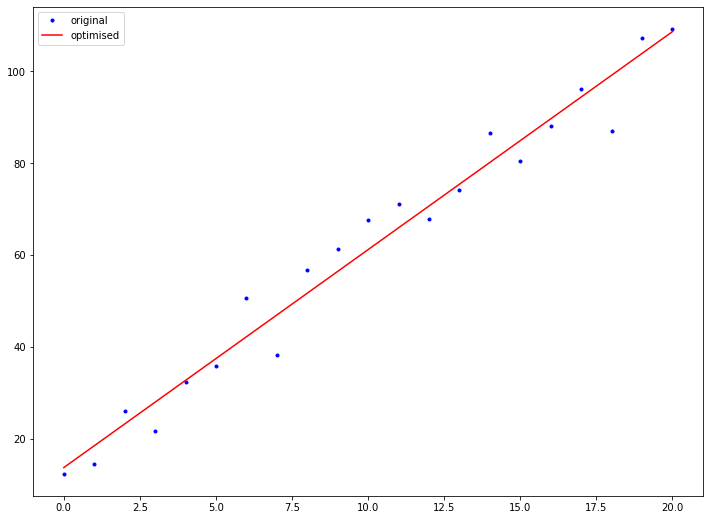

In [17]:
# Plot the figure of the original data points and the optimised line from scipy. 
fig, ax =plt.subplots(figsize=(12,9))

ax.plot(x,y, 'b.', label="original")
ax.plot(x, x*m_opt+c_opt, 'r' ,label = 'optimised')
ax.legend();

In [18]:
## Playing around with optimise from https://realpython.com/python-scipy-cluster-optimize/

In [19]:
# Using the example to try out. 
x = np.linspace(0, 1)

# function is y = 3x^4 - 2x + 1
y = 3*np.power(x,4)-2*x+1
y

array([1.        , 0.95918419, 0.91837567, 0.87759317, 0.83686792,
       0.79624362, 0.75577648, 0.71553519, 0.67560094, 0.6360674 ,
       0.59704073, 0.55863958, 0.52099509, 0.48425089, 0.4485631 ,
       0.41410033, 0.38104368, 0.34958674, 0.31993559, 0.29230879,
       0.2669374 , 0.24406497, 0.22394754, 0.20685363, 0.19306425,
       0.18287292, 0.17658563, 0.17452086, 0.17700958, 0.18439526,
       0.19703386, 0.21529381, 0.23955606, 0.27021401, 0.30767359,
       0.35235319, 0.4046837 , 0.46510851, 0.53408348, 0.61207698,
       0.69956986, 0.79705544, 0.90503957, 1.02404055, 1.1545892 ,
       1.29722882, 1.45251519, 1.62101658, 1.80331377, 2.        ])

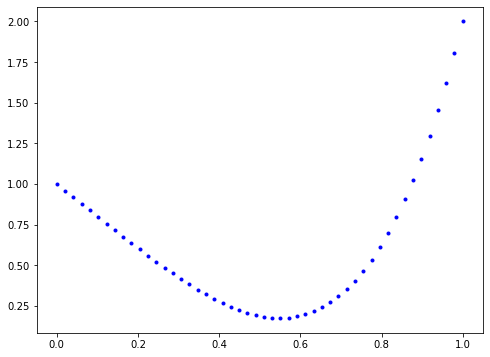

In [20]:
# Simple plot of the function. 
plt.plot(x,y, 'b.');

In [21]:
# defining the function to be used in the minimize calculation.
def f(x):
    y = 3*np.power(x,4)-2*x +1
    return y

In [22]:
# Using minimise, calling the function with aguess of 3 for the value of x at the minimum. 
result = so.minimize(f,3)

# The result of the optimizer is shown below. From a visual inspection of the plot it is very much in alignment with the result of the scipy function. 
result

      fun: 0.1745181877770634
 hess_inv: array([[0.09130335]])
      jac: array([4.04566526e-06])
  message: 'Optimization terminated successfully.'
     nfev: 22
      nit: 10
     njev: 11
   status: 0
  success: True
        x: array([0.55032157])

In [23]:
# Using minimize_scalar. This may be more appropriate where the function only has one variable. 
result = so.minimize_scalar(f)
result

     fun: 0.17451818777634331
    nfev: 16
     nit: 12
 success: True
       x: 0.5503212087491959

In [24]:
#Values of x (0.550321) and the resulting function value for y (0.174518187) at that value of x look same for both. 
result.x, result.fun

(0.5503212087491959, 0.17451818777634331)

### Exercise 1
---
Use numpy and matplotlib to plot the absolute value function.

Research and explain why the absolute value function is not typically used in fitting straight lines to data.

https://www.bradthiessen.com/html5/docs/ols.pdf

Really good document explaining the background to least squares vs absolute values in regression. 

In [25]:
# Generate the x independant variable, 20 integer values between 0 and 20. 
x = np.arange(0,21,1)

# generate some random noise.
randpart = np.random.normal(0,5,x.size)

# Generate the dependant variable y as 5x + 10 + noise.
y = 5*x+10+randpart

# Dataset is below and plotted 
x,y

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 array([  1.52404673,   9.36738669,  23.6778015 ,  24.99331899,
         31.67146046,  36.43782906,  39.06695152,  42.45868316,
         57.39508468,  56.46847063,  55.16556569,  68.75676843,
         71.9789341 ,  72.56252256,  85.43523738,  80.82006841,
         89.51691452,  97.0985444 , 112.19697677,  99.14051864,
        112.9229615 ]))

In [26]:
# Basic Cost function. Note the function has to take a single argument.
def cost_sq (MC):
    m,c = MC
    cost_sq = np.sum((y - m*x - c)**2)
    return cost_sq

In [27]:
# Test it out.
cost_sq((5,10))

476.76497406632654

In [28]:
# Basic Cost function. Note the function has to take a single argument.
def cost_abs(MC):
    m,c = MC
    cost_abs = np.sum(abs(y - m*x - c))
    return cost_abs

In [29]:
# Test it out.
cost_abs((5,10))

79.42409201516001